- Check for Colab Env
> if we are in colab env we need to get the data + scripts from github or somewhere

In [5]:
import os
if "COLAB_GPU" in os.environ:
    _useMultiProcessing = False
    os.system("git clone https://github.com/zaxo7/UNet-Playground.git")
    os.chdir("/content/UNet-Playground/")
else:
    _useMultiProcessing = True
    
if "PAPERSPACE_FQDN" in os.environ:
    !apt update
    !apt install libgl1 -y
    !pip install opencv-python 
    !git pull
    !pip install line_profiler
    !pip install memory_profiler


Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease                
Get:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:5 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [1174 kB]
Get:6 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [27.5 kB]
Get:7 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [874 kB]
Get:8 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [1816 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 Packages [30.2 kB]
Get:10 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [2245 kB]
Get:11 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1161 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [1252 kB]
Get

- enable module autoreload and fix an import bug

In [2]:
%load_ext autoreload
%autoreload 2

import sys,os
sys.path.append(os.getcwd() + '/scripts')

- import the scripts and data

In [3]:
from scripts import data, model
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2

2022-05-22 17:33:31.150382: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/zaxo7/tensorflow/lib/python3.8/site-packages/cv2/../../lib64:
2022-05-22 17:33:31.150413: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [7]:
test_img_files = sorted(glob.glob('data2/test/*.jpg'))
test_mask_label_files = sorted(glob.glob('data2/test/mask/*.jpg'))
test_WBC_mask_label_files = sorted(glob.glob('data2/test/WBC_mask/*.jpg'))
#test_edge_label_files = sorted(glob.glob('data2/test/edge/*.jpg'))

for i in np.arange(len(test_img_files)):
    imgs, mask, edge = data.load_data3([test_img_files[i]], [test_mask_label_files[i]], [test_WBC_mask_label_files[i]])
    
    img_chip, mask_chip, edge_chip = data.test_chips(imgs, mask, edge=edge, padding=100, input_size=188, output_size=100)
    
    Image_name = test_img_files[i].split('/')[-1].split('.')[-2]
    rootPath="data2/test/"
    
    for j in np.arange(len(img_chip)):
        cv2.imwrite(f"{rootPath}tiles/{Image_name}_{j}.jpg", (img_chip[j] + 1) * 255.0)
        cv2.imwrite(f"{rootPath}/mask/tiles/{Image_name}_{j}.jpg", (mask_chip[j]) * 255.0)
        cv2.imwrite(f"{rootPath}/WBC_mask/tiles/{Image_name}_{j}.jpg", (edge_chip[j]) * 255.0)
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178


In [ ]:
test_img_files = sorted(glob.glob('data2/train/*.jpg'))
test_mask_label_files = sorted(glob.glob('data2/train/mask/*.jpg'))
test_WBC_mask_label_files = sorted(glob.glob('data2/train/WBC_mask/*.jpg'))
#test_edge_label_files = sorted(glob.glob('data2/test/edge/*.jpg'))

for i in np.arange(len(test_img_files)):
    imgs, mask, edge = data.load_data3([test_img_files[i]], [test_mask_label_files[i]], [test_WBC_mask_label_files[i]])
    
    img_chip, mask_chip, edge_chip = data.test_chips(imgs, mask, edge=edge, padding=100, input_size=188, output_size=100)
    
    Image_name = test_img_files[i].split('/')[-1].split('.')[-2]
    rootPath="data2/train/"
    
    for j in np.arange(len(img_chip)):
        cv2.imwrite(f"{rootPath}tiles/{Image_name}_{j}.jpg", (img_chip[j] + 1) * 255.0)
        cv2.imwrite(f"{rootPath}/mask/tiles/{Image_name}_{j}.jpg", (mask_chip[j]) * 255.0)
        cv2.imwrite(f"{rootPath}/WBC_mask/tiles/{Image_name}_{j}.jpg", (edge_chip[j]) * 255.0)
        

In [3]:
from sklearn.utils import shuffle

def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        return noisy
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.004
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
                for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
                for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        return noisy

class DataGenerator(tf.keras.utils.Sequence):
    
    def __init__(self, image_files, mask_files, edge_files,
                 batch_size,
                 input_size=(188, 188, 3),
                 augment = True,
                 shuffle = False,
                 skip_empty = False):
        
        self.image_files = image_files
        self.mask_files = mask_files
        self.edge_files = edge_files
        self.batch_size = batch_size
        self.input_size = input_size
        
        self.augment = augment
        self.shuffle = shuffle
        self.skip_empty = skip_empty
        
        self.n = len(self.image_files)
    
    def on_epoch_end(self):
        self.image_files, self.mask_files, self.edge_files = shuffle(self.image_files, self.mask_files, self.edge_files)
    
    def __load_data(self, image_files, mask_files, edge_files):
        return data.load_data3(image_files, mask_files, edge_files, preprocess = False)
        
    def __normalize(self, images, masks, edges):
        
        for i in np.arange(len(images)):
            image = images[i]
            mask = masks[i]
            edge = edges[i]
            
            
            # rescale the image // normalisation to [-1,1] range
            image = image.astype(np.float32) * 2
            image /= 255
            image -= 1
            
            images[i] = image
            masks[i] = (mask > 0).astype(np.float32)#[..., np.newaxis]
            edges[i] = (edge > 0).astype(np.float32)#[..., np.newaxis]
        
        return images, masks, edges
    
    def __augment(self, images, masks, edges):
        
        # Select which type of cell to return // sometimes keep empty images
        #chip_type = np.random.choice([True, False])
        chip_type = True
        limit = len(images)
        i = 0
        while i < limit:
            
            image = images[i]
            mask = masks[i]
            edge = edges[i]
            
            if self.skip_empty:
                if (len(np.unique(image)) == 1) is chip_type:
                    #print(f"image {i} skiped")
                    limit = limit - 1
                    del images[i]
                    del masks[i]
                    del edges[i]
                    continue
                else:
                    i = i + 1
            else:
                i = i + 1
                    
            # randomly rotate
            rot = np.random.randint(4)
            image = np.rot90(image, k=rot, axes=(0, 1))
            mask = np.rot90(mask, k=rot, axes=(0, 1))
            edge = np.rot90(edge, k=rot, axes=(0, 1))

            # randomly flip
            if np.random.random() > 0.5:
                image = np.flip(image, axis=1)
                mask = np.flip(mask, axis=1)
                edge = np.flip(edge, axis=1)
                
            #add some noise to image
            noise_type = np.random.choice(['gauss', 'poisson', 's&p', 'speckle'])
            #image = noisy(noise_type, image)
            
            # randomly luminosity augment
            image = data.aug_img(image)
            
            #TODO add blur and noise (maybe with quad tree we can do some noise)

            
        
        
        return images, masks, edges
                
            
    
    def __getitem__(self, index):
        
        image_files = self.image_files[index * self.batch_size:(index + 1) * self.batch_size]
        mask_files = self.mask_files[index * self.batch_size:(index + 1) * self.batch_size]
        edge_files = self.edge_files[index * self.batch_size:(index + 1) * self.batch_size]
        
        images, masks, edges = self.__load_data(image_files, mask_files, edge_files)
        
        
        
        if self.augment:
            images, masks, edges = self.__augment(images, masks, edges)
            
        images, masks, edges = self.__normalize(images, masks, edges)
              
            
        images = np.asarray(images)
        masks = np.asarray(masks).astype(np.float32)[..., np.newaxis]
        edges = np.asarray(edges).astype(np.float32)[..., np.newaxis]
        
        #print(f"loading batch number {index}")
              
        return images, (masks, edges)
    
    def __len__(self):
        return self.n // self.batch_size


- model parameters

In [4]:
_batch_size = 8
_epochs = 5
_workers = 8
_model_name = f'tversky_100'
images_per_epoch = 1000
train_steps = images_per_epoch//_batch_size
#validation_steps = len(test_img_tile_files)//_batch_size

Train = True

In [5]:
database = "data2"

train_img_tile_files = sorted(glob.glob(f'{database}/train/tiles/*.jpg'))
train_mask_tile_label_files = sorted(glob.glob(f'{database}/train/mask/tiles/*.jpg'))
train_edge_tile_label_files = sorted(glob.glob(f'{database}/train/edge/tiles/*.jpg'))

test_img_tile_files = sorted(glob.glob(f'{database}/test/tiles/*.jpg'))
test_mask_tile_label_files = sorted(glob.glob(f'{database}/test/mask/tiles/*.jpg'))
test_edge_tile_label_files = sorted(glob.glob(f'{database}/test/edge/tiles/*.jpg'))

train_gen = DataGenerator(train_img_tile_files, train_mask_tile_label_files, train_mask_tile_label_files, _batch_size, skip_empty = False)

test_gen = DataGenerator(test_img_tile_files, test_mask_tile_label_files, test_mask_tile_label_files, _batch_size, skip_empty = False, augment=False)



In [21]:
image, (mask, edge) = train_gen.__getitem__(0)
image.min()

-0.96862745

- create the model and compile it

In [6]:
unet = model.get_do_unet(compile = False)

print(len(unet.layers))

#freese the last layer
ind = -1
print(f"freezing layer {unet.layers[ind].name}")
unet.layers[-1].trainable = False

unet.compile(optimizer="adam",
             loss=model.tversky_loss,
             loss_weights=[1, 0],
             metrics={'mask': [model.mean_iou, model.dsc, model.tversky, model.tversky_b, 'acc'], 
                      'edge': [model.mean_iou, model.dsc, model.tversky, model.tversky_b, 'acc']})

#unet.summary()

2022-05-20 17:57:10.046200: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-20 17:57:10.108501: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-20 17:57:10.108855: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-20 17:57:10.111222: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-20 17:57:10.111549: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read f

66
freezing layer edge


- load weights

In [7]:
print(f"loading model {_model_name}")
#unet.load_weights(f"models/{_model_name}_best.h5")

#unet.save('./tmp_model',save_format='tf')

objects = {
    "tversky_loss":model.tversky_loss,
    "mean_iou": model.mean_iou,
    "dsc":model.dsc,
    "tversky":model.tversky,
    "tversky_b":model.tversky_b,
    "acc": tf.keras.metrics.Accuracy,
    "tversky_loss_b": model.tversky_loss_b
}



unet = tf.keras.models.load_model(f'./models/{_model_name}', custom_objects=objects)

loading model tversky_100


- Train the model

In [8]:
if Train:
    history = unet.fit(train_gen, 
            epochs=_epochs, 
            validation_data=test_gen, 
            steps_per_epoch=train_steps,
            max_queue_size=2*_workers,
            use_multiprocessing=True,
            workers=_workers,
            verbose=1,
            callbacks=model.get_callbacks(_model_name + "_adv"))

Epoch 1/5
Instructions for updating:
Use fn_output_signature instead


2022-05-20 17:57:58.217099: E tensorflow/stream_executor/cuda/cuda_dnn.cc:382] Could not create cudnn handle: CUDNN_STATUS_INTERNAL_ERROR
2022-05-20 17:57:58.217371: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at conv_ops.cc:1120 : UNKNOWN: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node model/conv2d/Conv2D
 (defined at /usr/local/lib/python3.8/dist-packages/keras/layers/convolutional.py:231)
]] [Op:__inference_train_function_19485]

Errors may have originated from an input operation.
Input Source operations connected to node model/conv2d/Conv2D:
In[0] IteratorGetNext (defined at /usr/local/lib/python3.8/dist-packages/keras/engine/training.py:866)	
In[1] model/conv2d/Conv2D/ReadVariableOp:

Operation defined at: (most recent call last)
>>>   File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/traitlets/config/application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelapp.py", line 677, in start
>>>     self.io_loop.start()
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/tornado/platform/asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
>>>     self._run_once()
>>> 
>>>   File "/usr/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
>>>     handle._run()
>>> 
>>>   File "/usr/lib/python3.8/asyncio/events.py", line 81, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 461, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 450, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 357, in dispatch_shell
>>>     await result
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 652, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py", line 359, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/ipykernel/zmqshell.py", line 532, in run_cell
>>>     return super().run_cell(*args, **kwargs)
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2914, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2960, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3185, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3377, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3457, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "/tmp/ipykernel_2555/2989399122.py", line 2, in <module>
>>>     history = unet.fit(train_gen,
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 808, in train_step
>>>     y_pred = self(x, training=True)
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/keras/engine/base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py", line 451, in call
>>>     return self._run_internal_graph(
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py", line 589, in _run_internal_graph
>>>     outputs = node.layer(*args, **kwargs)
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/keras/engine/base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/keras/layers/convolutional.py", line 246, in call
>>>     outputs = self.convolution_op(inputs, self.kernel)
>>> 
>>>   File "/usr/local/lib/python3.8/dist-packages/keras/layers/convolutional.py", line 231, in convolution_op
>>>     return tf.nn.convolution(
>>> 

- save the training log 

In [29]:
#save the training log into a file
import json
my_dict = {'a':11,'b':22,'c':33}
with open(f"models/{_model_name}_log.json", "a+") as fp:
    json.dump(history.history,fp)

# Opening JSON file
with open(f"models/{_model_name}_log.json") as fp:
    # returns JSON object as
    # a dictionary
    loaded_hist = json.load(fp)

In [ ]:
train_img_chips, train_mask_chips, train_edge_chips = model.generate_test_dataset(glob.glob(f'data/test/*.jpg'))

load_data before preprocessing:
image: (652, 1226, 3)
mask : (652, 1226)
edge : (652, 1226)
load_data after preprocessing:
image: (1052, 1626, 3)
mask : (1052, 1626)
edge : (1052, 1626)
test_chips:
img_chips shape : (1302, 188, 188, 3)
mask_chips shape : (1302, 100, 100, 1)
edge_chips shape : (1302, 100, 100, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


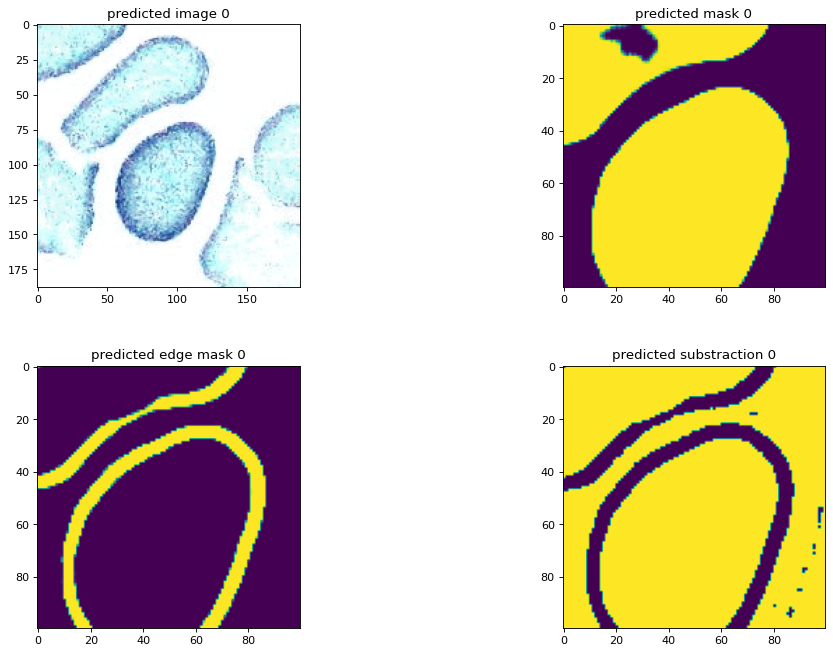

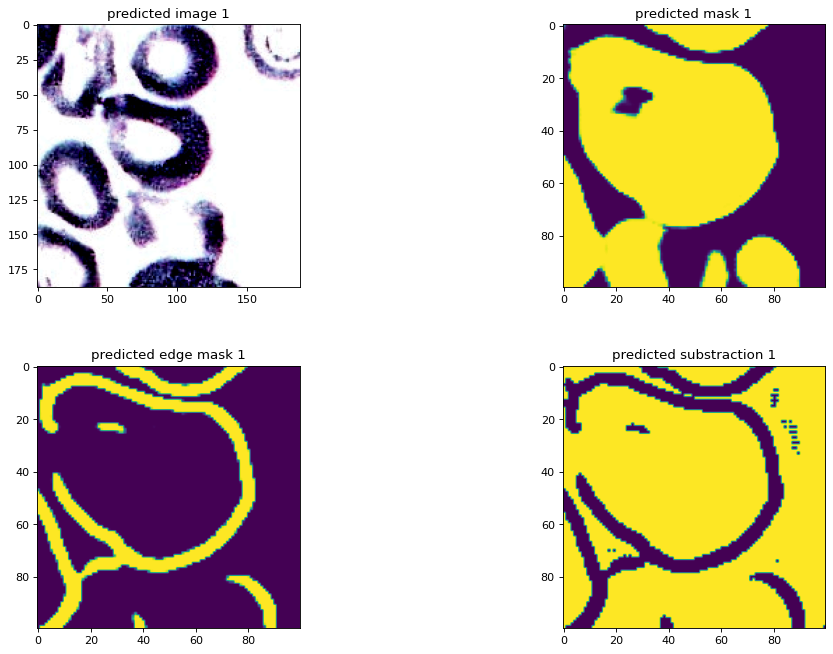

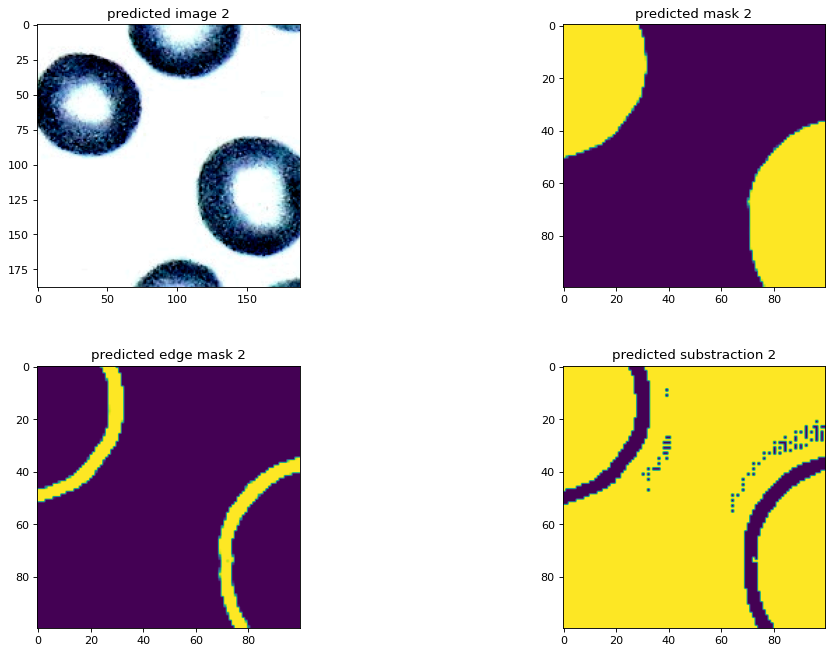

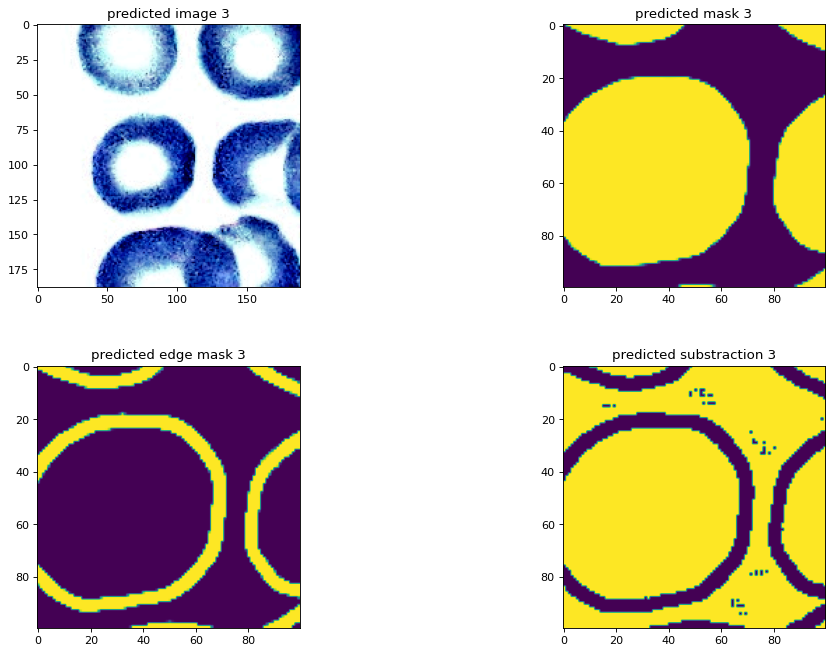

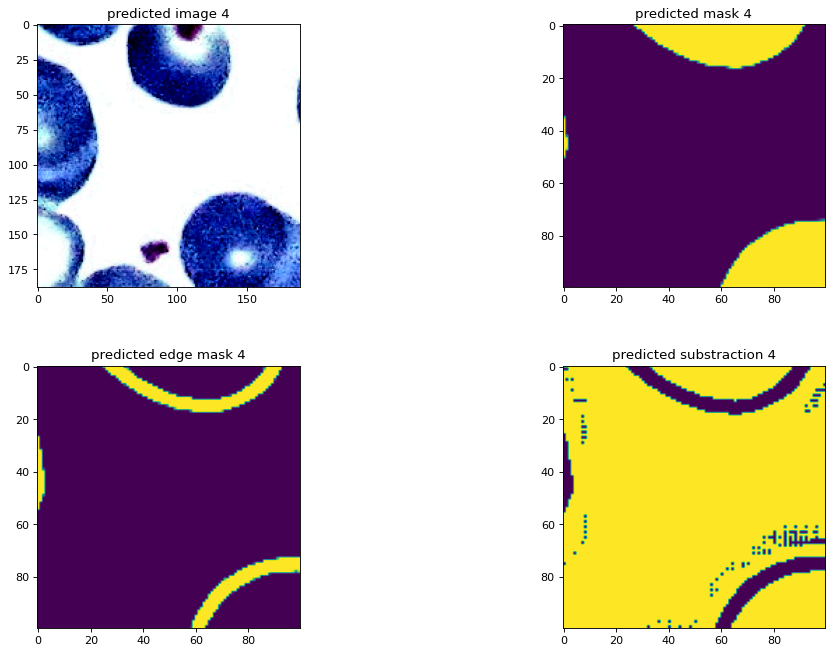

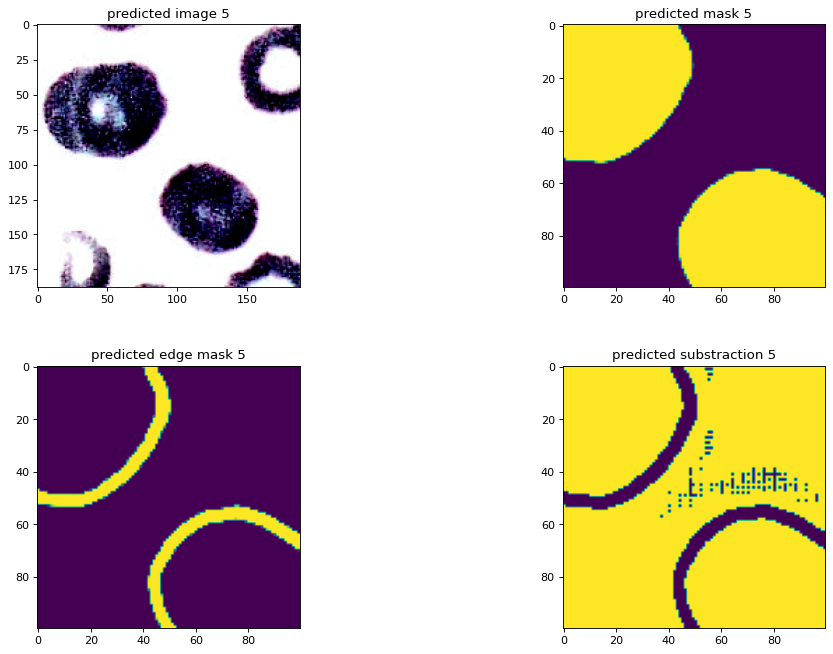

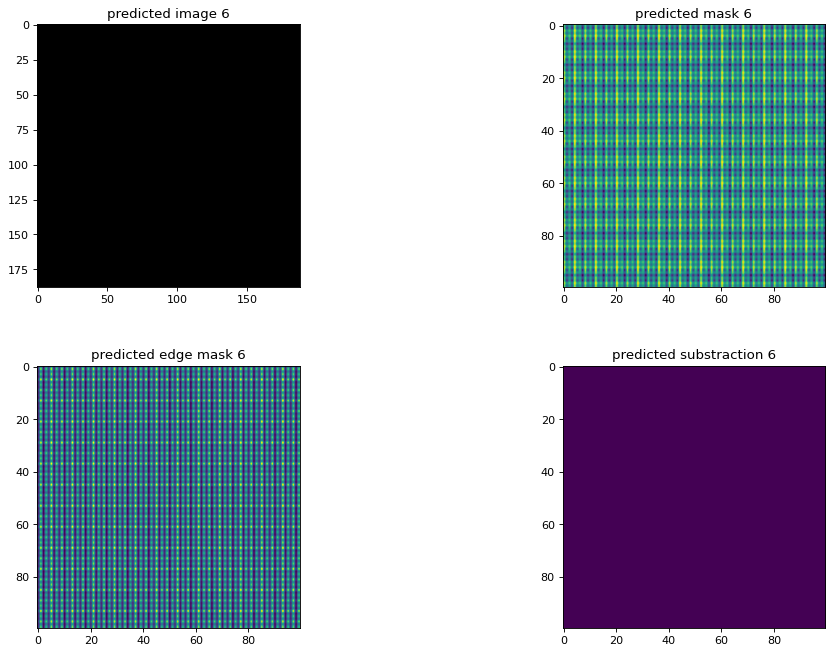

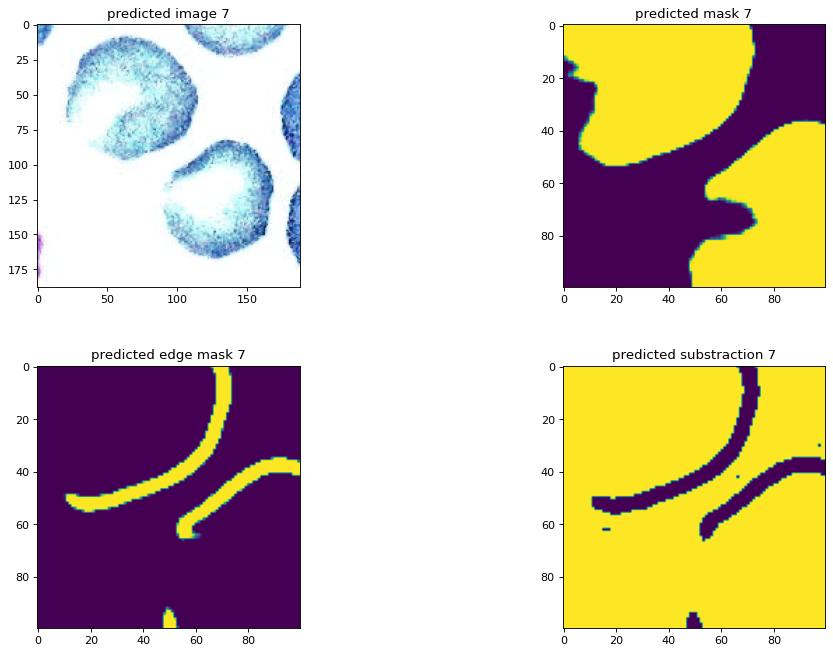

In [25]:

images, (masks, edges) = train_gen.__getitem__(1160)

#data.plot_ime(images, masks, edges)

prediction = unet.predict(images)

#prediction = np.squeeze(prediction)

data.plot_ime(images, prediction[0], prediction[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


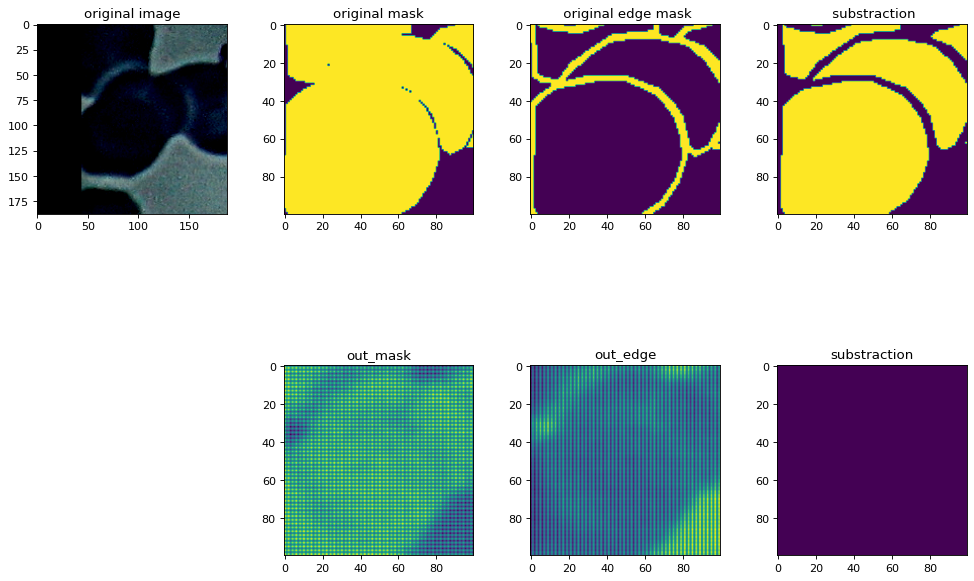

In [ ]:
fig = plt.figure(figsize=(15, 10), dpi=80)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
fig_num = 1
ax = fig.add_subplot(2, 4, fig_num)
ax.set_title("original image")
ax.imshow(img[0])
fig_num = fig_num + 1
ax = fig.add_subplot(2, 4, fig_num)
ax.set_title("original mask")
ax.imshow(mask)
fig_num = fig_num + 1
ax = fig.add_subplot(2, 4, fig_num)
ax.set_title(" original edge mask")
ax.imshow(edge)
fig_num = fig_num + 1
ax = fig.add_subplot(2, 4, fig_num)
ax.set_title(" substraction")
ax.imshow((mask - edge) > 0)


fig_num = fig_num + 2
ax = fig.add_subplot(2, 4, fig_num)
ax.set_title("out_mask")
ax.imshow(prediction[0])
fig_num = fig_num + 1
ax = fig.add_subplot(2, 4, fig_num)
ax.set_title("out_edge")
ax.imshow(prediction[1])
fig_num = fig_num + 1
ax = fig.add_subplot(2, 4, fig_num)
ax.set_title("substraction")
ax.imshow((prediction[0] - prediction[1]) > 0)




- predict full image

In [ ]:
images, masks, edges = model.predictFullImage(unet,
                          data.load_data_na(test_img_files),
                        padding=100,
                        input_size=188,
                        output_size=100,
                        normalize_output = False)

In [ ]:
data.plot_ime(images,
              masks,
              edges,
              figSize=(25,15))

## model training data plot

In [ ]:
hist = history.history

lines = 4
columns = 3

fig = plt.figure(figsize=(20, 20), dpi=80)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
fig_num = 1
ax = fig.add_subplot(lines, columns, fig_num)
ax.set_title("mask accuracy")
ax.plot(hist['mask_acc'], label="Training")
ax.plot(hist['val_mask_acc'], label="Validation")
ax.legend()
fig_num = fig_num + 1
ax = fig.add_subplot(lines, columns, fig_num)
ax.set_title("edge mask accuracy")
ax.plot(hist['edge_acc'], label="Training")
ax.plot(hist['val_edge_acc'], label="Validation")
ax.legend()
fig_num = fig_num + 2
ax = fig.add_subplot(lines, columns, fig_num)
ax.set_title("mask loss")
ax.plot(hist['mask_loss'], label="Training")
ax.plot(hist['val_mask_loss'], label="Validation")
ax.legend()
fig_num = fig_num + 1
ax = fig.add_subplot(lines, columns, fig_num)
ax.set_title("edge loss")
ax.plot(hist['edge_loss'], label="Training")
ax.plot(hist['val_edge_loss'], label="Validation")
ax.legend()

fig_num = fig_num + 1
ax = fig.add_subplot(lines, columns, fig_num)
ax.set_title("global loss")
ax.plot(hist['loss'], label="Training")
ax.plot(hist['val_loss'], label="Validation")
ax.legend()


fig_num = fig_num + 1
ax = fig.add_subplot(lines, columns, fig_num)
ax.set_title("mask metrics")
ax.plot(hist['mask_dsc'], label="dsc")
ax.plot(hist['mask_mean_iou'], label="mean iou")
ax.plot(hist['mask_tversky'], label="tversky")
ax.plot(hist['mask_acc'], label="accuracy")

ax.set_title("mask metrics")
ax.plot(hist['val_mask_dsc'], label="val_dsc")
ax.plot(hist['val_mask_mean_iou'], label="val_mean iou")
ax.plot(hist['val_mask_tversky'], label="val_tversky")
ax.plot(hist['val_mask_acc'], label="val_accuracy")

fig_num = fig_num + 1
ax = fig.add_subplot(lines, columns, fig_num)
ax.set_title("edge metrics")
ax.plot(hist['edge_dsc'], label="dsc")
ax.plot(hist['edge_mean_iou'], label="mean iou")
ax.plot(hist['edge_tversky'], label="tversky")
ax.plot(hist['edge_acc'], label="accuracy")

ax.set_title("edge metrics")
ax.plot(hist['val_edge_dsc'], label="val_dsc")
ax.plot(hist['val_edge_mean_iou'], label="val_mean iou")
ax.plot(hist['val_edge_tversky'], label="val_tversky")
ax.plot(hist['val_edge_acc'], label="val_accuracy")
ax.legend()

## For Debugging
- show in between layers output

In [17]:
ind = np.random.randint(0, 32, 1)[0]

_pool1 = pool1[:-1,:-1,ind]
_pool2 = pool2[:-1,:-1,ind]
_pool3 = pool3[:-1,:-1,ind]
_down4 = down4[:-1,:-1,ind]
_up1 = up1[:-1,:-1,ind]
_up2 = up2[:-1,:-1,ind]
_up3 = up3[:-1,:-1,ind]

fig = plt.figure(figsize=(15, 10), dpi=80)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
fig_num = 1
ax = fig.add_subplot(3, 3, fig_num)
ax.set_title("out_mask")
ax.imshow(out_mask)
fig_num = fig_num + 1
ax = fig.add_subplot(3, 3, fig_num)
ax.set_title("out_edge")
ax.imshow(out_edge)
fig_num = fig_num + 1
ax = fig.add_subplot(3, 3, fig_num)
ax.set_title("pool1")
ax.imshow(_pool1)
fig_num = fig_num + 1
ax = fig.add_subplot(3, 3, fig_num)
ax.set_title("pool2")
ax.imshow(_pool2)
fig_num = fig_num + 1
ax = fig.add_subplot(3, 3, fig_num)
ax.set_title("pool3")
ax.imshow(_pool3)
fig_num = fig_num + 1
ax = fig.add_subplot(3, 3, fig_num)
ax.set_title("down4")
ax.imshow(_down4)
fig_num = fig_num + 1
ax = fig.add_subplot(3, 3, fig_num)
ax.set_title("up1")
ax.imshow(_up1)
fig_num = fig_num + 1
ax = fig.add_subplot(3, 3, fig_num)
ax.set_title("up2")
ax.imshow(_up2)
fig_num = fig_num + 1
ax = fig.add_subplot(3, 3, fig_num)
ax.set_title("up3")
ax.imshow(_up3)

NameError: name 'pool1' is not defined

- function to plot and array of images of shape (width, height, n_images)

In [ ]:
def picshow(img, title):
    num = img.shape[2]
    imgs_per_line = 4
    ax = num//imgs_per_line + 1
    ay = imgs_per_line
    fig =plt.figure(figsize=(30, num//imgs_per_line * 10))
    fig.subplots_adjust(hspace=0.1, wspace=0.1)
    for i in range(1,num + 1):
        sub = fig.add_subplot(ax,ay,i)
        sub.set_title(f"{title} {i}")
        sub.imshow(img[:-1,:-1,i - 1])
    plt.show()
    



In [ ]:
picshow(pool1, 'pool1 ')
picshow(pool2, 'pool2 ')
picshow(pool3, 'pool3 ')
picshow(down4, 'down4 ')
picshow(up1, 'up1 ')
picshow(up2, 'up2 ')
picshow(up3, 'up3 ')